Úkol 1

V souboru s daty na Slacku máš data o hodnotách finančních indikátorů 100 největších společností obchodovaných na americké burze. Naším cílem je zjistit, které indikátory nejvíce ovlivňují cenu, a vytvořit model, který odhadne cenu akcie na základě hodnot finančních indikátorů.

Jeden z indikátorů je označený jako Y a je poměrem ceny a účetní hodnoty akcie. Hodnota indikátoru je odrazem ceny akcie. Ostatní indikátory jso následující:

běžná likvidita (Current Ratio, CR),

zadluženost (Debt to Assets, DA),

finanční páka (Financial Leverage, FL)

provozní zisková marže (Operating Profit Margin, OPM),

obrat pohledávek (Receivables Turnover, RT),

obrat celkových aktiv (Total Assets Turnover, TAT).


Část 1

Vytvoř korelační matici a podívej se, který ukazatel má největší vliv na indikátor Y akcie.



In [263]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

df = pd.read_csv("df.csv")
df_corr = df.drop(columns=["Company", "Sector"])
df_corr.head()

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT
0,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93
1,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48
2,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38
3,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15
4,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06


In [264]:
df_corr.corr()

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT
CR,1.000000,-0.225917,-0.179232,0.284529,-0.151203,-0.123665,-0.141136,-0.018690,-0.040483
DA,-0.225917,1.000000,0.340320,0.015032,0.206620,-0.083691,0.464786,0.164599,-0.120993
FL,-0.179232,0.340320,1.000000,-0.112430,-0.076335,0.156169,0.968612,0.759323,0.032588
OPM,0.284529,0.015032,-0.112430,1.000000,0.051672,-0.298701,-0.050014,0.051308,0.021409
RT,-0.151203,0.206620,-0.076335,0.051672,1.000000,0.206580,-0.065267,-0.046290,0.097708
TAT,-0.123665,-0.083691,0.156169,-0.298701,0.206580,1.000000,0.094869,0.301222,0.017872
DE,-0.141136,0.464786,0.968612,-0.050014,-0.065267,0.094869,1.000000,0.724604,-0.025348
Y,-0.018690,0.164599,0.759323,0.051308,-0.046290,0.301222,0.724604,1.000000,-0.001363
PT,-0.040483,-0.120993,0.032588,0.021409,0.097708,0.017872,-0.025348,-0.001363,1.000000


<Axes: xlabel='FL', ylabel='Y'>

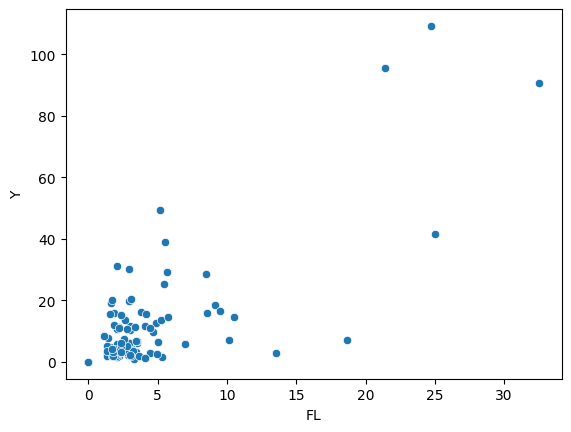

In [265]:
sns.scatterplot(data=df_corr, x="FL", y="Y" )

Odpověď: Jednu z největších přímých závislostí na ukazatel Y akcie má ukazatel FL (finanční páka), avšak z grafu lze vyčíst jistou náhodu. 

Část 2

Vytvoř regresní model, který bude mít koeficient Y jako vysvětlovanou proměnnou. Do modelu vlož hodnoty ostatních indikátorů jako vysvětlující proměnné.

S využitím modulu statsmodels vytvoř regresní model a zobraz si tabulku se souhrnem významů. Podívej se na hodnoty koeficientů a na výsledky testu statistické významnosti koeficientů. Pokud je některý koeficient (nebo více koeficientů) nevýznamný, sestav nový model bez tohoto koeficientů (případně beze všech nevýznamných koeficientů).

<Axes: xlabel='FL', ylabel='Y'>

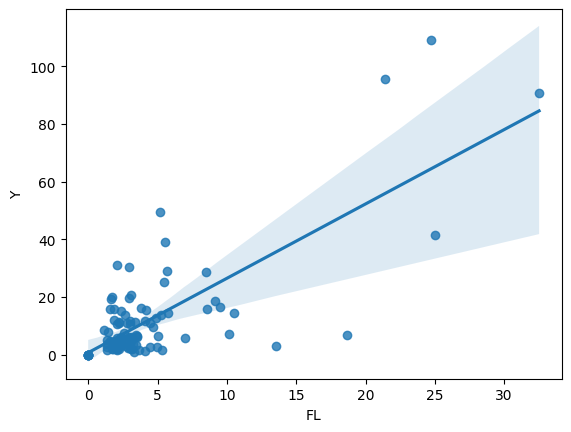

In [266]:
sns.regplot(data=df_corr, x="FL", y="Y" )

In [267]:
y_data = df_corr["Y"]
x_data = df_corr[["CR", "DA", "FL", "OPM", "RT", "TAT", "DE", "PT"]]
formula = "y_data ~ x_data"
mod = smf.ols(formula=formula, data=df_corr)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_data   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           1.45e-18
Time:                        22:08:09   Log-Likelihood:                -375.94
No. Observations:                 100   AIC:                             769.9
Df Residuals:                      91   BIC:                             793.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0176      5.347     -2.061      0.042     -21.638      -0.397
x_data[0]      1.5014      1.240      1.211      0.229      -0.961       3.964
x_data[1]     -5.2206      9.370     -0.557      0.579     -23.834      13.392
x_data[2]      3.0104      1.060      2.840      0.006       0.905       5.116
x_data[3]     23.4665      8.076      2.906      0.005       7.425      39.508
x_data[4]     -0.0063      0.021     -0.300      0.765      -0.048       0.035
x_data[5]      8.4254      2.351      3.584      0.001       3.756      13.095
x_data[6]     -0.7283      2.066     -0.352      0.725      -4.833       3.376
x_data[7]     -0.0644      0.096     -0.669      0.505      -0.256       0.127
==============================================================================
Omnibus:                       29.136   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.551
Skew:                           0.881   Prob(JB):                     8.88e-23
Kurtosis:                       7.611   Cond. No.                         592.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [268]:
y_data_vyznamny = df_corr["Y"]
x_data_vyznamny = df_corr[[ "FL", "OPM", "TAT"]]
formula = "y_data_vyznamny ~ x_data_vyznamny"
mod = smf.ols(formula=formula, data=df_corr)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        y_data_vyznamny   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     59.51
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           7.99e-22
Time:                        22:08:09   Log-Likelihood:                -377.99
No. Observations:                 100   AIC:                             764.0
Df Residuals:                      96   BIC:                             774.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -10.4188      2.865     -3.637      0.000     -16.106      -4.732
x_data_vyznamny[0]     2.5281      0.208     12.149      0.000       2.115       2.941
x_data_vyznamny[1]    24.8478      7.542      3.295      0.001       9.878      39.818
x_data_vyznamny[2]     8.5518      2.205      3.879      0.000       4.176      12.928
==============================================================================
Omnibus:                       26.748   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.291
Skew:                           0.876   Prob(JB):                     2.71e-17
Kurtosis:                       6.904   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Pro všechna data odhadni ukazatel Y s využitím tvého modelu a odhadnuté ceny vlož do původní tabulky s daty. Dále vypočítej rozdíl mezi odhadem koeficientu a jeho skutečnou hodnotou. Najdi akcii, kde je tento rozdíl největší (tj. hledáme akcii, které náš model predikuje výrazně vyšší cenu než jaká je ve skutečnosti, tato akcie je potenciálně na trhu podhodnocená).

In [269]:
y_predict = df_corr["Y"]
y_predict = res.predict(df_corr)
df_corr["y_predict"] = y_predict
df_corr["y_difference"] = df_corr["y_predict"] - df_corr["Y"]
df_corr


,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,y_predict,y_difference
0,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,0.502359,-1.447641
1,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,23.356512,16.096512
2,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,6.944718,-0.835282
3,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,15.708512,9.538512
4,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,1.701358,1.701358
...,...,...,...,...,...,...,...,...,...,...,...
95,1.50,0.37,2.33,0.2557,4.92,0.41,0.85,5.18,6.83,5.331550,0.151550
96,0.70,0.27,2.57,0.2363,16.11,0.64,0.69,7.40,2.70,7.423167,0.023167
97,1.49,0.12,2.36,0.2576,8.64,0.51,0.28,5.99,7.59,6.309785,0.319785
98,2.30,0.64,25.03,0.3758,7.48,0.31,16.08,41.57,10.54,64.848968,23.278968


In [270]:
df_corr["y_difference"].max()
podhodnocena_akcie = df_corr[df_corr["y_difference"] > 34 ]
podhodnocena_akcie


,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,y_predict,y_difference
79,0.76,0.37,18.64,0.0631,12.44,0.41,6.93,6.97,3.4,41.779545,34.809545
